In [3]:
%pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 6.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 9.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 6.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.5 MB/s eta 0:00:00


In [12]:
dataset_path = "/Users/Ashu LOQ/Downloads/dataset/Pest and Disease/Dataset"

train_dir = os.path.join(dataset_path, 'train_set')
test_dir = os.path.join(dataset_path, 'test_set')

In [7]:
crops = ['Cashew', 'Cassava', 'Maize', 'Tomato']

In [9]:
def restructure_dataset():
    for crop in crops:
        crop_dir = os.path.join(dataset_path, crop)  # Crop folder path
        for data_split in ['train_set', 'test_set']:
            split_path = os.path.join(crop_dir, data_split)
            if not os.path.exists(split_path):
                print(f"Path not found: {split_path}")
                continue

            for category in os.listdir(split_path):
                category_path = os.path.join(split_path, category)
                if os.path.isdir(category_path):
                    # Rename category folder with crop name for uniqueness
                    new_name = f"{category.replace(' ', '_')}_{crop.lower()}"
                    target_dir = train_dir if 'train' in data_split else test_dir
                    target_path = os.path.join(target_dir, new_name)

                    # Avoid overwriting or conflicts
                    if os.path.exists(target_path):
                        print(f"Conflict: {target_path} already exists. Skipping.")
                        continue
                    
                    # Move the directory
                    shutil.move(category_path, target_path)
                    print(f"Moved {category_path} to {target_path}")

# Run the restructuring
restructure_dataset()
print("Dataset restructuring completed!")

# Verify the directory structure
print("\nTrain Directory Contents:")
print(os.listdir(train_dir))

print("\nTest Directory Contents:")
print(os.listdir(test_dir))

Dataset restructuring completed!

Train Directory Contents:
['anthracnose_cashew', 'bacterial_blight_cassava', 'brown_spot_cassava', 'fall_armyworm_maize', 'grasshoper_maize', 'green_mite_cassava', 'gumosis_cashew', 'healthy_cashew', 'healthy_cassava', 'healthy_maize', 'healthy_tomato', 'leaf_beetle_maize', 'leaf_blight_maize', 'leaf_blight_tomato', 'leaf_curl_tomato', 'leaf_miner_cashew', 'leaf_spot_maize', 'mosaic_cassava', 'red_rust_cashew', 'septoria_leaf_spot_tomato', 'streak_virus_maize', 'verticulium_wilt_tomato']

Test Directory Contents:
['anthracnose_cashew', 'bacterial_blight_cassava', 'brown_spot_cassava', 'fall_armyworm_maize', 'grasshoper_maize', 'green_mite_cassava', 'gumosis_cashew', 'healthy_cashew', 'healthy_cassava', 'healthy_maize', 'healthy_tomato', 'leaf_beetle_maize', 'leaf_blight_maize', 'leaf_blight_tomato', 'leaf_curl_tomato', 'leaf_miner_cashew', 'leaf_spot_maize', 'mosaic_cassava', 'red_rust_cashew', 'septoria_leaf_spot_tomato', 'streak_virus_maize', 'vertic

In [13]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial_blight_cassava': 1, 'brown_spot_cassava': 2, 'fall_armyworm_maize': 3, 'grasshoper_maize': 4, 'green_mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf_beetle_maize': 11, 'leaf_blight_maize': 12, 'leaf_blight_tomato': 13, 'leaf_curl_tomato': 14, 'leaf_miner_cashew': 15, 'leaf_spot_maize': 16, 'mosaic_cassava': 17, 'red_rust_cashew': 18, 'septoria_leaf_spot_tomato': 19, 'streak_virus_maize': 20, 'verticulium_wilt_tomato': 21}


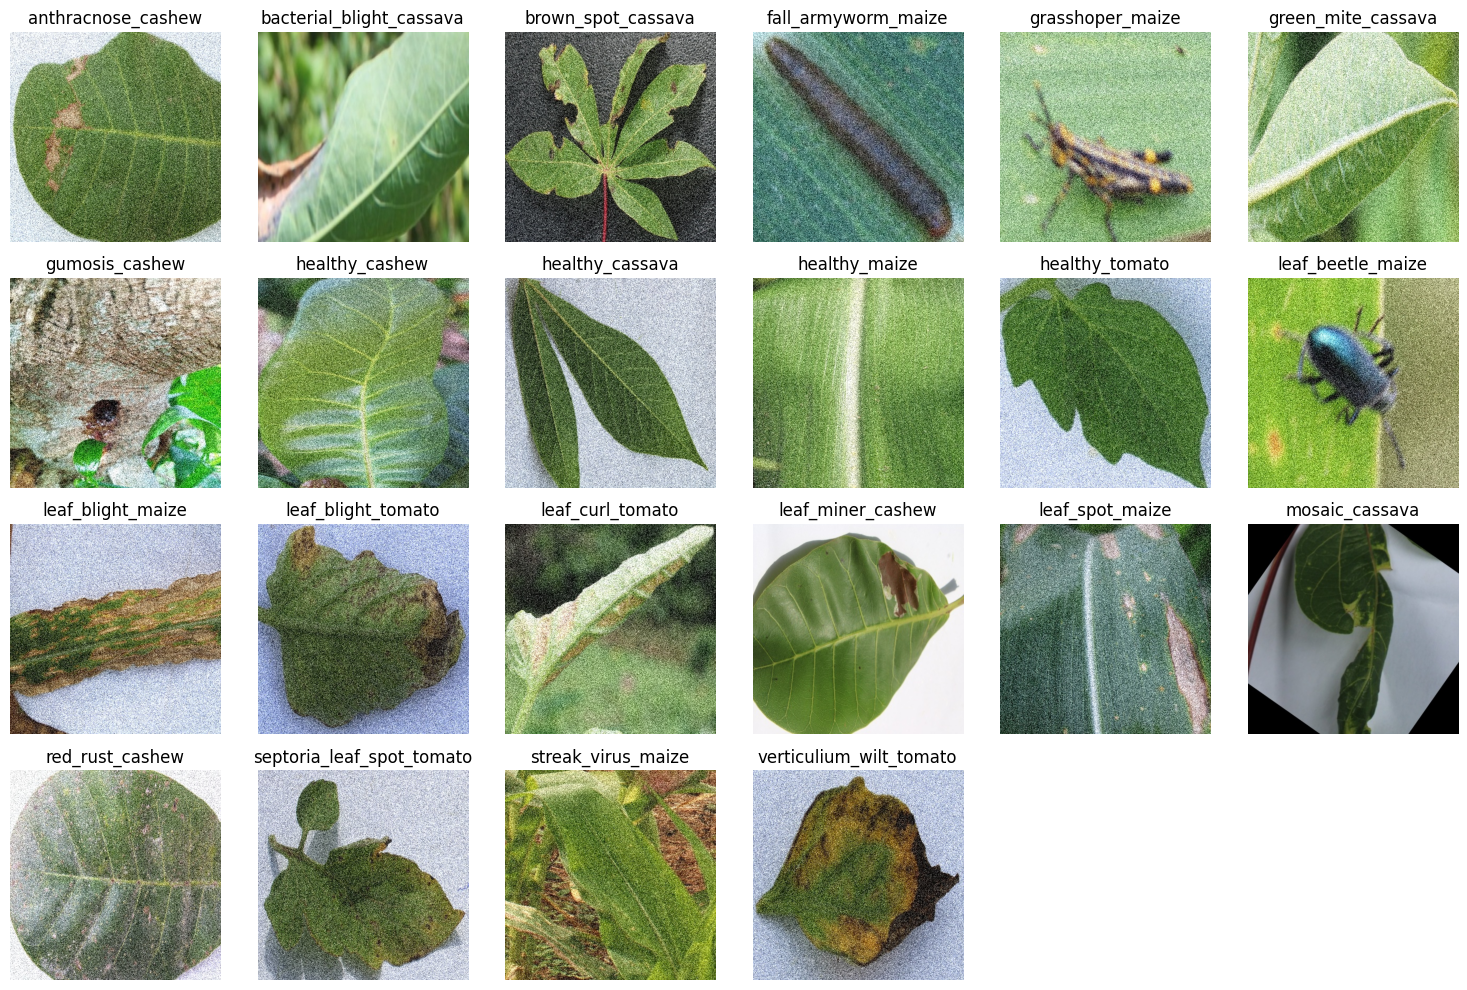

In [18]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the dataset
train_dir = "/Users/Ashu LOQ/Downloads/dataset/Pest and Disease/Dataset/train_set"

# Dictionary to store a single image path for each class
class_images = {}

# Loop through the directory structure to collect one image per class
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    
    if os.path.isdir(class_path):  # Ensure it's a directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_path.endswith(('.JPG')):  # Check for valid image extensions
                class_images[class_name] = image_path
                break  # Stop after finding one image for the class

# Display one image per class
plt.figure(figsize=(15, 10))
for idx, (class_name, image_path) in enumerate(class_images.items()):
    image = cv2.imread(image_path)  # Read image using OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    plt.subplot(4, 6, idx + 1)  # Adjust grid size as per number of classes
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()
